This notebook is served as an exercise platform for Fundemental Statistics concepts found in "Practical Statistics for Data Scientists"

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [7]:
state = pd.read_csv("data\state.csv")

---
The code compared the 3 measures of location which are means, median and trimmed mean. Because of outliers, median and trimmed mean is said to be more "robust", meaning the result is not skewed. 

In [19]:
mean = state['Population'].mean()
median = state['Population'].median()
trimmed = stats.trim_mean(state['Population'], 0.1)
print(f'mean = {mean}\nmedian = {median}\ntrimmed mean = {trimmed}')


mean = 6162876.3
median = 4436369.5
trimmed mean = 4783697.125


<AxesSubplot:xlabel='Population', ylabel='Count'>

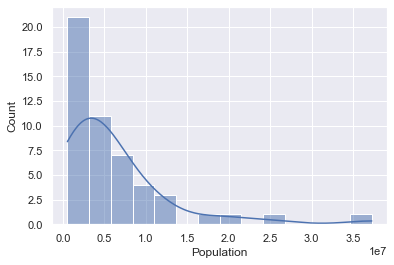

In [57]:
sns.histplot(state['Population'], kde=True)

In [32]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

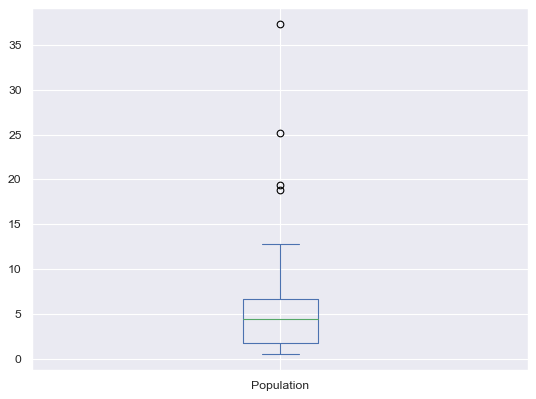

In [58]:
figure(figsize=(8, 6), dpi=80)
ax = (state['Population']/1_000_000).plot.box()

In [62]:
air = pd.read_csv("data/dfw_airline.csv")

<AxesSubplot:>

<Figure size 640x480 with 0 Axes>

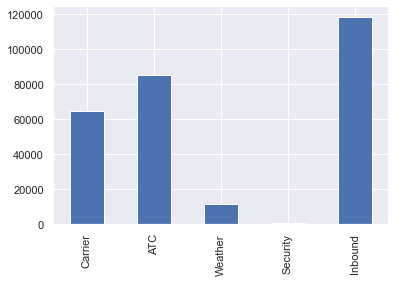

In [72]:
figure(figsize=(8, 6), dpi=80)
air.transpose().plot.bar(legend=False)

In [73]:
airline = pd.read_csv("data/airline_stats.csv")

In [74]:
airline

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


The visualizations below are used to compare a numeric value (amount of delayed flight) between categories (airlines). While the boxplots are easier to read, the violin plot show the hidden distribution of data from each category (ie: the difference in distribution shape of Alaska).

<AxesSubplot:xlabel='airline', ylabel='pct_carrier_delay'>

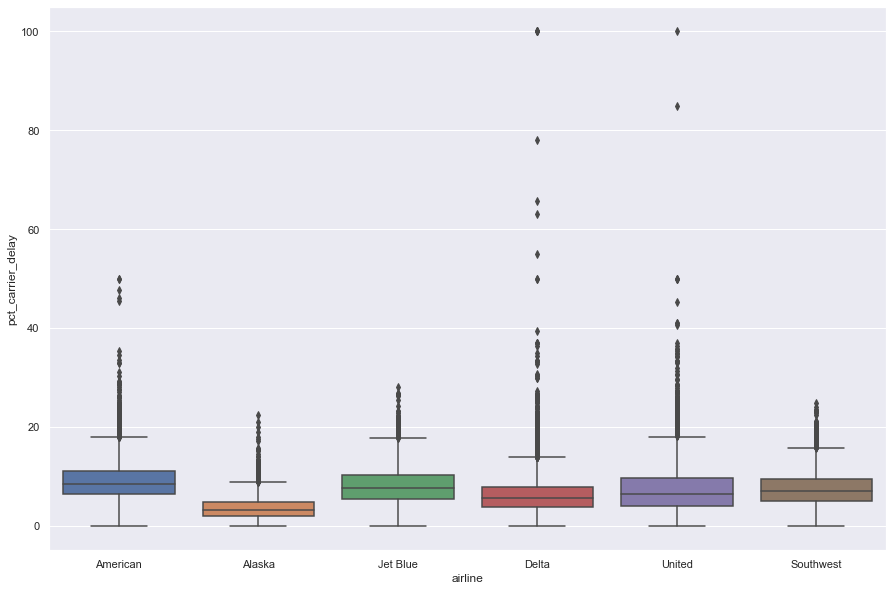

In [80]:
plt.figure(figsize=(15,10))
sns.boxplot(x='airline', y='pct_carrier_delay', data=airline)

<AxesSubplot:xlabel='airline', ylabel='pct_carrier_delay'>

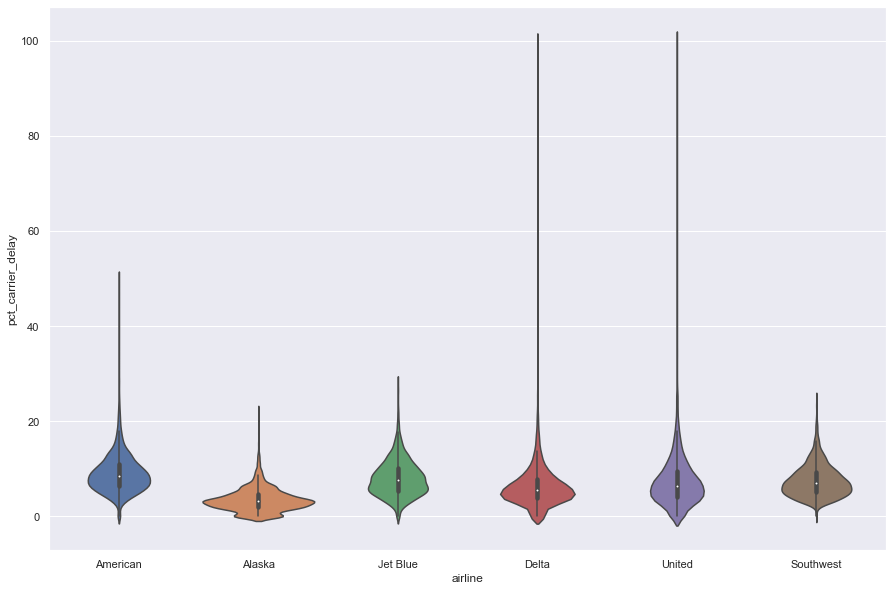

In [82]:
plt.figure(figsize=(15,10))
sns.violinplot(x='airline', y='pct_carrier_delay', data=airline)

---

In [89]:
loans_income = pd.read_csv("data/loans_income.csv")

In [144]:

sample_mean_05 = pd.DataFrame({
'income': [loans_income.x.sample(5).mean() for _ in range(1000)],
'type': 'Mean of 5',
})
sample_mean_20 = pd.DataFrame({
'income': [loans_income.x.sample(20).mean() for _ in range(1000)],
'type': 'Mean of 20',
})
results = pd.concat([sample_mean_05, sample_mean_20])

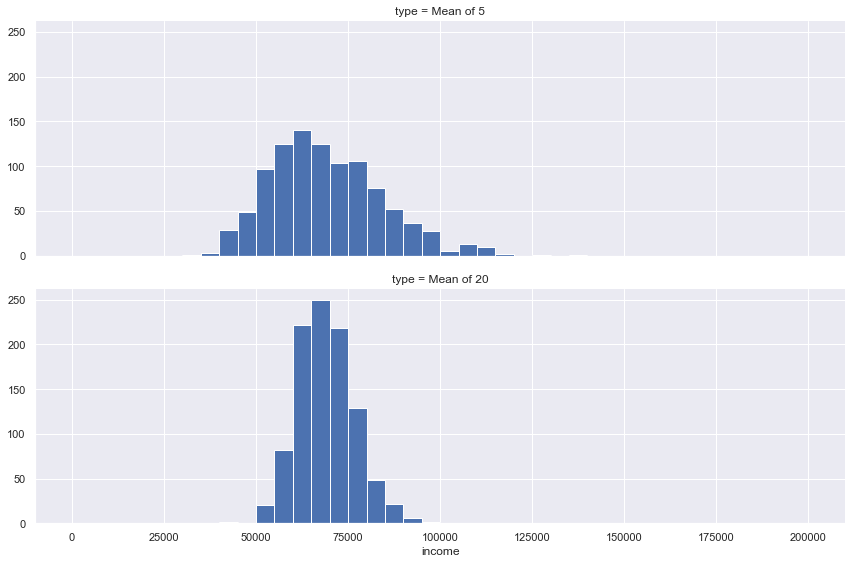

In [150]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=4, aspect=3)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)

In [ ]:
sns.histplot()